# WeatherPy
----

#### Note
For Part I, you must include a written description of three observable trends based on the data:

The only obvious correlation of weather and latitude was that of max heat and latitude. We see from the scatter plots that the closer the latitude is to the equator, the higher the max temps, and the farther away the latitude is from the equator, the lower the max temps. The humidity, cloudiness, and wind speed were not correlated with latitude and these weather factors tended to be mostly scattered without any patterns associated with latitude. These observations were confirmed with the use of trendlines; the only trendlines that showed correlation were those on the Northern and Southern latitude vs max temperature scatter plots. All other weather factors had no clear correlation or correlation at all with latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

611


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build url using base url + api key + units

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# build lists and for loop to print out cities 

city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
counter = 0
record_counter = 0
setcount = 1

for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    
    try:
        weather_response = requests.get(query_url + city).json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
        
    except:
        print("City not found: " + city)
        
print(len(weather_response))

processing Record 1 of Set 1 | atuona
processing Record 2 of Set 1 | busselton
processing Record 3 of Set 1 | jamestown
processing Record 4 of Set 1 | kodiak
processing Record 5 of Set 1 | victoria
processing Record 6 of Set 1 | khatanga
processing Record 7 of Set 1 | hobart
processing Record 8 of Set 1 | albany
processing Record 9 of Set 1 | natal
processing Record 10 of Set 1 | carutapera
processing Record 11 of Set 1 | bluff
processing Record 12 of Set 1 | bengkulu
processing Record 13 of Set 1 | torbay
processing Record 14 of Set 1 | cap malheureux
processing Record 15 of Set 1 | fairbanks
processing Record 16 of Set 1 | nizhneyansk
City not found: nizhneyansk
processing Record 17 of Set 1 | dhidhdhoo
processing Record 18 of Set 1 | mar del plata
processing Record 19 of Set 1 | ancud
processing Record 20 of Set 1 | cherskiy
processing Record 21 of Set 1 | tasiilaq
processing Record 22 of Set 1 | ilulissat
processing Record 23 of Set 1 | dikson
processing Record 24 of Set 1 | mataur

processing Record 40 of Set 4 | mys shmidta
City not found: mys shmidta
processing Record 41 of Set 4 | pisco
processing Record 42 of Set 4 | longyearbyen
processing Record 43 of Set 4 | mildura
processing Record 44 of Set 4 | oktyabrskoye
processing Record 45 of Set 4 | murovani kurylivtsi
processing Record 46 of Set 4 | foam lake
processing Record 47 of Set 4 | bambous virieux
processing Record 48 of Set 4 | matara
processing Record 49 of Set 4 | vasterhaninge
processing Record 50 of Set 4 | lata
5
0
200
processing Record 1 of Set 5 | rusape
processing Record 2 of Set 5 | pingzhuang
processing Record 3 of Set 5 | arman
processing Record 4 of Set 5 | nikolskoye
processing Record 5 of Set 5 | karaton
processing Record 6 of Set 5 | yellowknife
processing Record 7 of Set 5 | mae hong son
processing Record 8 of Set 5 | bowen
processing Record 9 of Set 5 | kargasok
processing Record 10 of Set 5 | delta del tigre
processing Record 11 of Set 5 | cardston
processing Record 12 of Set 5 | daru


processing Record 28 of Set 8 | ashtian
processing Record 29 of Set 8 | skagastrond
City not found: skagastrond
processing Record 30 of Set 8 | aldan
processing Record 31 of Set 8 | muli
processing Record 32 of Set 8 | umzimvubu
City not found: umzimvubu
processing Record 33 of Set 8 | obregon
processing Record 34 of Set 8 | vao
processing Record 35 of Set 8 | roma
processing Record 36 of Set 8 | egvekinot
processing Record 37 of Set 8 | camalu
processing Record 38 of Set 8 | ayolas
processing Record 39 of Set 8 | ambilobe
processing Record 40 of Set 8 | faisalabad
processing Record 41 of Set 8 | tambura
processing Record 42 of Set 8 | barrow
processing Record 43 of Set 8 | songjianghe
processing Record 44 of Set 8 | northam
processing Record 45 of Set 8 | yangmei
processing Record 46 of Set 8 | luvianos
processing Record 47 of Set 8 | sylvania
processing Record 48 of Set 8 | la asuncion
processing Record 49 of Set 8 | galiwinku
City not found: galiwinku
processing Record 50 of Set 8 |

processing Record 15 of Set 12 | heishan
processing Record 16 of Set 12 | cidreira
processing Record 17 of Set 12 | norre alslev
processing Record 18 of Set 12 | qaqortoq
processing Record 19 of Set 12 | san juan
processing Record 20 of Set 12 | tarnogskiy gorodok
processing Record 21 of Set 12 | los llanos de aridane
processing Record 22 of Set 12 | morondava
processing Record 23 of Set 12 | dzemul
processing Record 24 of Set 12 | marawi
processing Record 25 of Set 12 | dudinka
processing Record 26 of Set 12 | alpinopolis
processing Record 27 of Set 12 | verkhnyaya sinyachikha
processing Record 28 of Set 12 | gamba
processing Record 29 of Set 12 | nioro
processing Record 30 of Set 12 | araraquara
processing Record 31 of Set 12 | denpasar
processing Record 32 of Set 12 | cefalu
processing Record 33 of Set 12 | mount gambier
processing Record 34 of Set 12 | tecpatan
processing Record 35 of Set 12 | kropotkin
processing Record 36 of Set 12 | merthyr tydfil
processing Record 37 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dataframe with cleaned up column names

weather_df = pd.DataFrame({"City": city_list,
                          "Latitude": lat_list,
                          "Longitude": lng_list,
                          "Max Temp": max_temp_list,
                          "Humidity": humidity_list,
                          "Cloudiness": cloudiness_list,
                          "Wind Speed (mph)": windspeed_list})
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
0,Atuona,-9.8000,-139.0333,79.97,75,37,12.82
1,Busselton,-33.6500,115.3333,57.00,93,90,1.01
2,Jamestown,42.0970,-79.2353,71.60,49,75,16.11
3,Saint Paul Harbor,57.7900,-152.4072,39.20,87,90,13.80
4,Hong Kong,22.2855,114.1577,75.99,78,100,10.04
...,...,...,...,...,...,...,...
556,Alofi,-19.0595,-169.9187,75.20,83,98,11.50
557,Tiarei,-17.5333,-149.3333,78.80,73,20,2.30
558,Kanniyākumāri,8.0833,77.5667,83.16,76,50,4.07
559,Bulawayo,-20.1500,28.5833,56.59,67,52,11.01


In [6]:
# print stats - take note there is no humidity higher than 100%

weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,19.289309,17.139528,63.715401,66.452763,54.910873,8.002692
std,33.048480,90.735809,20.253980,21.100144,36.497200,5.177391
min,-54.800000,-179.166700,0.970000,3.000000,0.000000,0.450000
25%,-8.190000,-63.166700,50.000000,52.000000,20.000000,4.470000
50%,21.346900,24.731400,68.000000,70.000000,64.000000,6.910000
75%,48.005600,98.517400,80.220000,83.000000,90.000000,10.980000
max,78.218600,179.316700,100.850000,100.000000,100.000000,46.040000


In [7]:
# output to csv file using aforementioned variable

weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

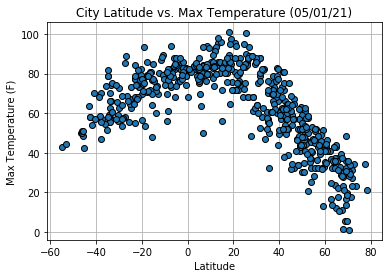

In [14]:
fig, ax = plt.subplots()
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/01/21)")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/max_temp.png", dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

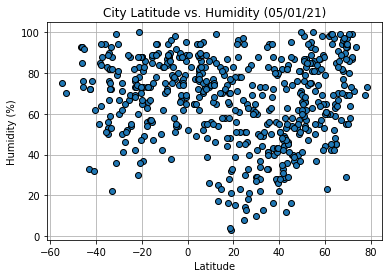

In [15]:
fig, ax = plt.subplots()
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/01/21)")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/humidity.png", dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

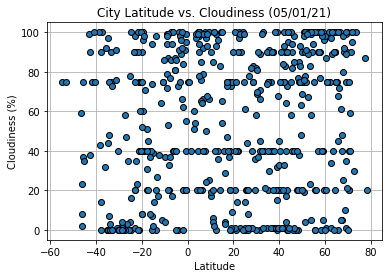

In [16]:
fig, ax = plt.subplots()
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (05/01/21)")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/cloudiness.png", dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

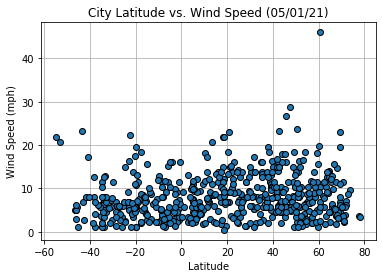

In [17]:
fig, ax = plt.subplots()
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], edgecolor="black", linewidths=1, marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (05/01/21)")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/wind_speed.png", dpi=300, bbox_inches='tight')
plt.show()

## Linear Regression

In [22]:
# create northern and southern hemisphere dataframes before plotting data

northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7416519279039312
The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.


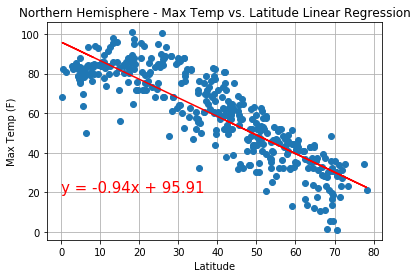

In [27]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/max_temp_regression_northern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a negative correlation between max temp and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5208864971065992
The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.


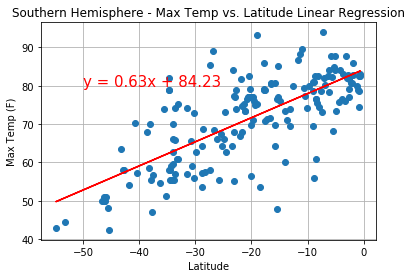

In [28]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/max_temp_regression_southern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows a positive correlation between max temp and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013291631267394504
The regression shows no significant correlation between humidity and latitude in the Northern Hemisphere.


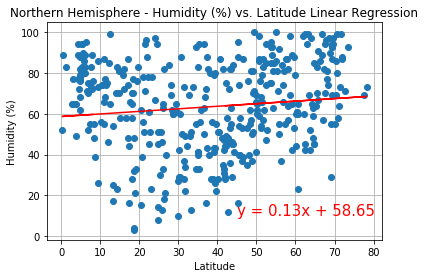

In [29]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/humidity_regression_northern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between humidity and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010561733326059844
The regression shows no significant correlation between humidity and latitude in the Southern Hemisphere.


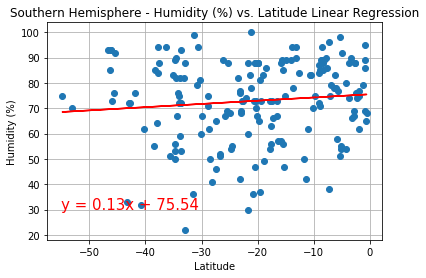

In [30]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/humidity_regression_southern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between humidity and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0025128721155103103
The regression shows no significant correlation between cloudiness and latitude in the Northern Hemisphere.


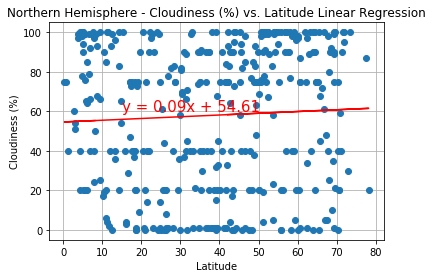

In [31]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/cloudiness_regression_northern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between cloudiness and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.040780667361456385
The regression shows no significant correlation between cloudiness and latitude in the Southern Hemisphere.


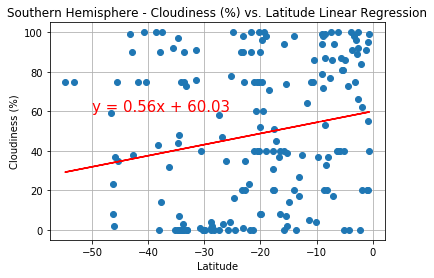

In [32]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/cloudiness_regression_southern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between cloudiness and latitude in the Southern Hemisphere.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000728427530177871
The regression shows no significant correlation between wind speed and latitude in the Northern Hemisphere.


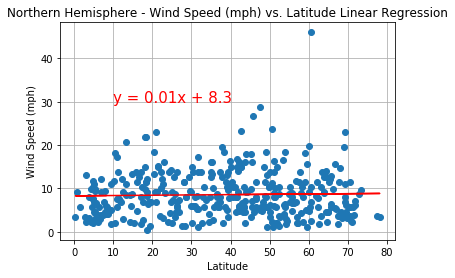

In [33]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed (mph)"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/wind_speed_regression_northern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between wind speed and latitude in the Northern Hemisphere.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006264387859001417
The regression shows no significant correlation between wind speed and latitude in the Southern Hemisphere.


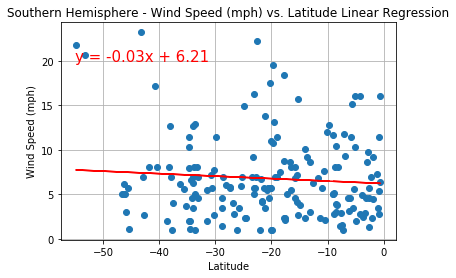

In [34]:
# print out the r-squared value along with the plot.

fig, ax = plt.subplots()
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed (mph)"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
ax.grid()
ax.set_axisbelow(True)
plt.savefig("../output_data/wind_speed_regression_southern.png", dpi=300, bbox_inches='tight')
print(f"The r-squared is: {rvalue**2}")
print("The regression shows no significant correlation between wind speed and latitude in the Southern Hemisphere.")
plt.show()